# Titanic Data Investigation

For this project, I have chosen Titanic data to investigate which contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. After looking at the dataset, I am curious about asking the questions that what are the important factors in deciding the survival of the passenger of Titanic, so I proposed below questions and carried out analysis based on that, 

1. Does any gender has better rate of survival? 
2. Does Socio-economic class has difference in rate of their survival? 
3. Does any age group has better rate of survival? 
4. Does embarked has affect on rate of survival? 

To carry out further analysis, I have imported various libraries which will be used at latter stage for analysis and imported the titanic dataset,

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the Titanic data, we can see the various features present for each passenger on the ship:

* Survived: Outcome of survival (0 = No; 1 = Yes)
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Name: Name of passenger
* Sex: Sex of the passenger
* Age: Age of the passenger (Some entries contain NaN)
* SibSp: Number of siblings and spouses of the passenger aboard
* Parch: Number of parents and children of the passenger aboard
* Ticket: Ticket number of the passenger
* Fare: Fare paid by the passenger
* Cabin Cabin number of the passenger (Some entries contain NaN)
* Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

I also need to check for the missing values in all of the columns as they will create problems in latter analyais. For getting information of the complete pandas dataframe, 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin and embarked has some missing values. But I only need age and embarked columns for latter analysis, so I don't need cabin column and will remove that for faster further analysis. 
For filling missing values for the age columns, I will replace them with the mean for the embarked, sex, and pclass. The following code will replace these values, 

In [ ]:
for  index,record in data.iterrows():
    if pd.isnull(record['Age']):
        idx = (data['Sex'] == record['Sex']) \
                & (data['Embarked'] == record['Embarked']) \
                & (data['Pclass'] == record['Pclass'])
        data['Age'][index] = data['Age'][idx].mean()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Now coming to the embarked column. Firstly printing out the whole rows to see if there any different thing going on there

In [6]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


For replacing values for the nulls, I will replace theis values with most frequent embarked column. For that lets see which of the embarked is the most frequent one, 

In [7]:
data.groupby('Embarked',)['PassengerId'].count().reset_index()

,Embarked,PassengerId
0,C,168
1,Q,77
2,S,644


So, replacing nulls with most frequent embarked value 's' to carry out further analysis. 

In [8]:
data['Embarked'].fillna('S', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


And removing the columns that will not be useful for further analysis, 

In [9]:
columns_to_drop = ['Name','Fare','Cabin','SibSp','Parch']
data.drop(columns_to_drop, axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
Ticket         891 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 48.8+ KB


Only thing left for the data wrangling phase is to factorize age column into age ranges group with difference of 10 units, e.g. 0-9,10-19 and so on, 

In [10]:
print data['Age'].describe() # for getting information about range of the age variable
labels   = ['0-29','30-59','60-89']
bin_size = range(0,91,30)
print bin_size
data['Age'] = pd.cut(data['Age'], bin_size, right=False, labels=labels)

count    891.000000
mean      29.320943
std       13.312758
min        0.420000
25%       22.000000
50%       27.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64
[0, 30, 60, 90]


In [11]:
data['Age'].describe()

count      891
unique       3
top       0-29
freq       523
Name: Age, dtype: object

# Analysis Phase

### Question 1

Coming to the analysis phase for the aforementioned questions, coming to the first question that whether gender column has impact on the survival rate, lets first plot the survival with gender, 

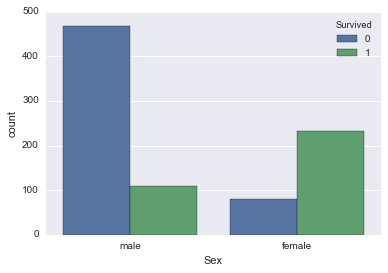

In [12]:

#sns.barplot(x="Survived", y="Survived", hue="Sex", data=data);
sns.countplot(x="Sex",hue="Survived", data=data)
#sns.factorplot(x="Sex", y="total_bill", hue="smoker", data=tips, kind="bar");

It is clear from the above graph between sex of the passengers and their corresponding survival rates. It is obvious from above graph that more female survived as compared  to the male gender. Below are some descriptive statistics for that  

In [13]:
print pd.crosstab(data['Survived'],data['Sex']).apply(lambda r: (r/r.sum())*100, axis=0)

Sex          female       male
Survived                      
0         25.796178  81.109185
1         74.203822  18.890815


In [17]:
#Source code stub taken from previous reviewer for chi-squared test
pivot = pd.pivot_table(data = data[['Survived', 'Sex']], index = 'Survived', columns = ['Sex'], aggfunc = len)
pivot
print pivot,"\n"
# Pclass      1   2    3
# Survived              
# 0          80  97  372
# 1         136  87  119
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Pclass to Survival."
print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Sex       female  male
Survived              
0             81   468
1            233   109 

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 260.717020167
Pvalue = 1.19735706278e-58




Considering the above results, we can rejects the null hypothesis for any reasonable value of alpha that the gender has no impact on the survival rate. And considering the above crosstab results, we are more sure about that more women survived as compared to the men, so gender do have impact on the survival rate. 

### Question 2
Now coming to the second question that does socio-economic group has impact on the survival rate, firstly make the count plot for visually seeing distribution of data

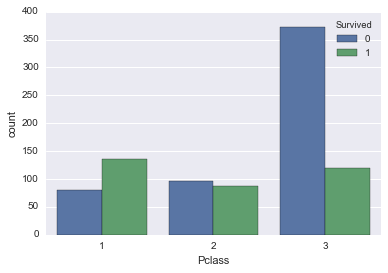

In [128]:
sns.countplot(x="Pclass",hue="Survived", data=data)

considering the above graph, Pclass 1 and 2 has almost same survival rate, but for the 3rd Pclass, more people died as compared to the other classes. So, Pclass do have impact on the number of people survived. Lets make crosstab for that too,  

In [133]:
print pd.crosstab(data['Survived'],data['Pclass']).apply(lambda r: (r/r.sum())*100, axis=0)

Pclass            1          2          3
Survived                                 
0         37.037037  52.717391  75.763747
1         62.962963  47.282609  24.236253


Considering above result, it is obvious that more people belonging to the 3rd pclass died as compared to other classes. Considering the chi-squared test with null hypothesis that pclass has no impact on the survival rate and grouping data into two groups. 
*  One with with pclass of 1 and 2
*  Second with pclass of 3

In [18]:
#Source code stub taken from previous reviewer for chi-squared test
pivot = pd.pivot_table(data = data[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
pivot
print pivot,"\n"
# Pclass      1   2    3
# Survived              
# 0          80  97  372
# 1         136  87  119
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print "Results of Chi-Squared test on Pclass to Survival."
print "Does Pclass have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)
print "\n"

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Results of Chi-Squared test on Pclass to Survival.
Does Pclass have a significant effect on Survival?
Chi-Squared Score = 102.888988757
Pvalue = 4.5492517113e-23




Considering above test results, for any reasonable value of alpha, we can reject the null hypothesis that pclass has no impact on the survival rate. 

### Question 3
Coming to the third question about age group have impact on the survival rate of the Titanic passengers, lets first make count plot for that, 

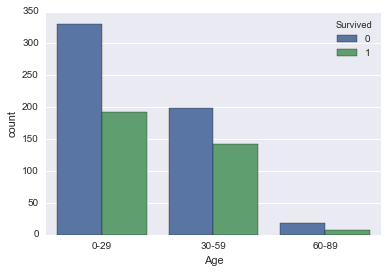

In [142]:
sns.countplot(x="Age",hue="Survived", data=data)

considering above plot, it is obvious that the 0-29 and 60-89 age group people proportion has died more compared to other age groups. Firstly make histogram for the respective age variable for the above dataset

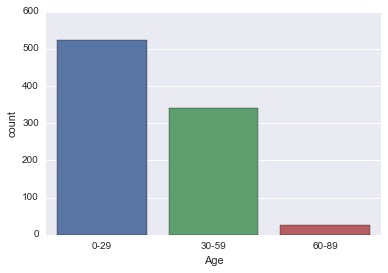

In [147]:
sns.countplot(x="Age", data=data)

As there are more people in the 0-29 and 30-59 age group as compared to third group, lets make cross table below for further analysis.Lets make crosstab for that, but it is not so much significant as compared to the Sex and Pclass columns.

In [144]:
print pd.crosstab(data['Survived'],data['Age']).apply(lambda r: (r/r.sum())*100, axis=0)

Age            0-29      30-59      60-89
Survived                                 
0         63.288719  58.187135  73.076923
1         36.711281  41.812865  26.923077


So, for the age group 0-29 and 60-89 more people died as compared to other group, but this difference between these groups is not too large. 

Now coming to the last question about the embarked has impact on the survival, 

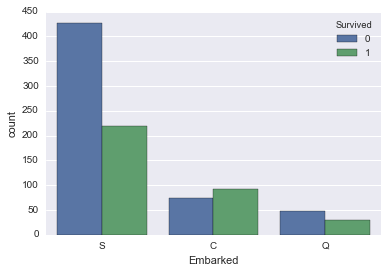

In [145]:
sns.countplot(x="Embarked",hue="Survived", data=data)

which also depicts that S socio-economic class people died more as compared to other class people, lets make percentate crosstab table for that data, 

In [146]:
print pd.crosstab(data['Survived'],data['Embarked']).apply(lambda r: (r/r.sum())*100, axis=0)

Embarked          C          Q          S
Survived                                 
0         44.642857  61.038961  66.099071
1         55.357143  38.961039  33.900929


## Limitations
Althouth there are some limitations of the analysis performed, like there are some of the columns with missing values. As there are always workarounds for fixing those missing values like with means of the similar records or omitting the records with missing values. But each of the approach has its own pros and cons. Also there could be more variables like number of saving boats, is_passenger or is_staff of ship, is_passenger knows swimming and other variables which can prove a lot usefule while analyzing the dataset. 
Now coming to the relationship between the survival rate and the other variables like Sex, pclass, the above analysis does not imply any sort of correlation between the dependent and indepedent variables, as correlation doesnot implies causation for the studies in which you have not controlled other factors. So, the above analysis is tentative and doesnot imply any causation between the survival rate and other variables. 

## Conclusion

In a nutshell, considering the above analysis, it is obvious that some of the variables do have significant impact on the survival rate of the titanic passengers. Among the variables that I have analyzed Sex and PClass are pretty siginficant for the survival of the Titanic passengers.